## 랜덤포레스트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import koreanize_matplotlib


In [2]:
df = pd.read_csv('데이터/WEC_Sydney_100.csv')
df

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,51814.27,59556.86,68341.92,70731.90,64192.86,69757.10,75581.40,69741.63,0.65,6925096.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.0,398.0,0.0,...,52910.73,58836.45,66358.12,70612.76,56787.64,64467.41,70684.50,65052.85,0.66,6931277.32
2314,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.0,398.0,0.0,...,61488.75,61218.11,60007.02,59046.63,63865.77,67528.12,73769.96,66491.47,0.68,7192144.17
2315,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.0,198.0,200.0,...,52752.08,54870.32,59601.57,57798.28,66660.45,69518.08,74935.21,68514.79,0.64,6799187.00
2316,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.0,1398.0,0.0,...,58755.78,64815.63,62083.71,58053.22,80885.70,82062.11,80004.48,69454.11,0.67,7084526.52


In [3]:
df.shape

(2318, 302)

In [4]:
# 데이터 지정 

from sklearn.preprocessing import StandardScaler

target_column = 'Total_Power'

x = df[df.columns.drop([target_column])]
y = df[[target_column]]

In [5]:
# 학습 준비 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=12)


In [6]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (1854, 301), y_train : (1854, 1)
x_test : (464, 301) , y_test : (464, 1)


In [7]:
# 학습 진행 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=12, oob_score=True)

model.fit(x_train, y_train)

c:\Users\sh321\anaconda3\envs\MyWeb_39\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(oob_score=True, random_state=12)

In [8]:
# 모델 파라미터 

print(f'feature_names_in_ : {model.feature_names_in_}')
print(f'n_features_in_ : {model.n_features_in_}개')
print(f'feature_importances_ : {model.feature_importances_}')

feature_names_in_ : ['X1' 'Y1' 'X2' 'Y2' 'X3' 'Y3' 'X4' 'Y4' 'X5' 'Y5' 'X6' 'Y6' 'X7' 'Y7'
 'X8' 'Y8' 'X9' 'Y9' 'X10' 'Y10' 'X11' 'Y11' 'X12' 'Y12' 'X13' 'Y13' 'X14'
 'Y14' 'X15' 'Y15' 'X16' 'Y16' 'X17' 'Y17' 'X18' 'Y18' 'X19' 'Y19' 'X20'
 'Y20' 'X21' 'Y21' 'X22' 'Y22' 'X23' 'Y23' 'X24' 'Y24' 'X25' 'Y25' 'X26'
 'Y26' 'X27' 'Y27' 'X28' 'Y28' 'X29' 'Y29' 'X30' 'Y30' 'X31' 'Y31' 'X32'
 'Y32' 'X33' 'Y33' 'X34' 'Y34' 'X35' 'Y35' 'X36' 'Y36' 'X37' 'Y37' 'X38'
 'Y38' 'X39' 'Y39' 'X40' 'Y40' 'X41' 'Y41' 'X42' 'Y42' 'X43' 'Y43' 'X44'
 'Y44' 'X45' 'Y45' 'X46' 'Y46' 'X47' 'Y47' 'X48' 'Y48' 'X49' 'Y49' 'X50'
 'Y50' 'X51' 'Y51' 'X52' 'Y52' 'X53' 'Y53' 'X54' 'Y54' 'X55' 'Y55' 'X56'
 'Y56' 'X57' 'Y57' 'X58' 'Y58' 'X59' 'Y59' 'X60' 'Y60' 'X61' 'Y61' 'X62'
 'Y62' 'X63' 'Y63' 'X64' 'Y64' 'X65' 'Y65' 'X66' 'Y66' 'X67' 'Y67' 'X68'
 'Y68' 'X69' 'Y69' 'X70' 'Y70' 'X71' 'Y71' 'X72' 'Y72' 'X73' 'Y73' 'X74'
 'Y74' 'X75' 'Y75' 'X76' 'Y76' 'X77' 'Y77' 'X78' 'Y78' 'X79' 'Y79' 'X80'
 'Y80' 'X81' 'Y81' 'X82' 'Y82' 

In [9]:
feature_importance_dict = {}

for i in range(model.n_features_in_):
    feature_importance_dict[model.feature_names_in_[i]]=model.feature_importances_[i]

In [10]:
feature_importance_sorted_dict = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
feature_importance_sorted_dict[0], feature_importance_sorted_dict[1], feature_importance_sorted_dict[2]

(('qW', 0.913810238003805),
 ('Power100', 0.010932202169224574),
 ('Power47', 0.002730842593174535))

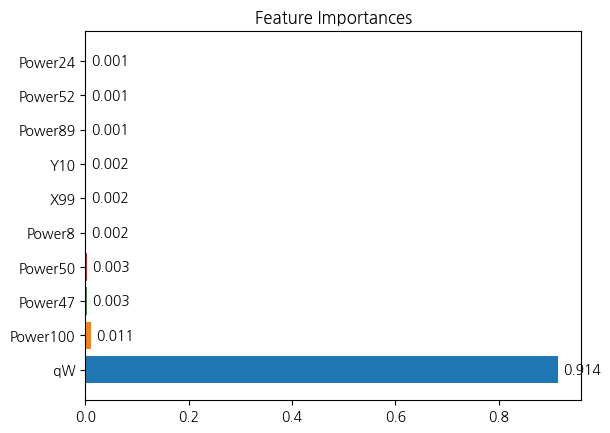

In [11]:

for i in range(10):

    bar = plt.barh(i, feature_importance_sorted_dict[i][1])

    plt.text(feature_importance_sorted_dict[i][1] + 0.01, i, 
             f"{feature_importance_sorted_dict[i][1]:.3f}", 
             va='center')

plt.yticks(range(10), [feature_importance_sorted_dict[i][0] for i in range(10)])

plt.title('Feature Importances')
plt.show()

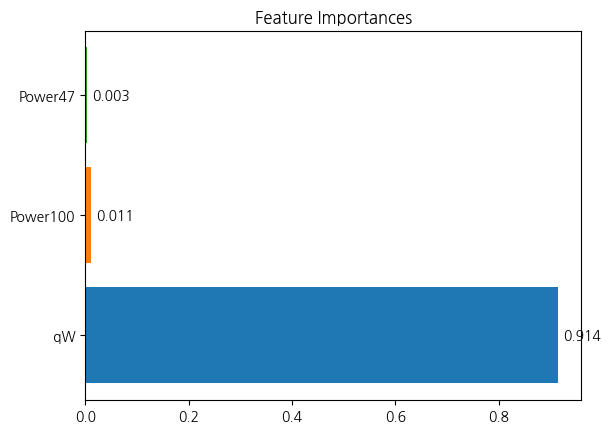

In [12]:
random_num = int(input('사용할 주요 피처의 개수를 선택하시오 : '))

for i in range(random_num):

    bar = plt.barh(i, feature_importance_sorted_dict[i][1])

    plt.text(feature_importance_sorted_dict[i][1] + 0.01, i, 
             f"{feature_importance_sorted_dict[i][1]:.3f}", 
             va='center')

plt.yticks(range(random_num), [feature_importance_sorted_dict[i][0] for i in range(random_num)])



plt.title('Feature Importances')
plt.show()

In [13]:

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.9955201270995767, test_score : 0.9743776525738523


In [14]:
feature_importance_name_num = [feature_importance_sorted_dict[i][0] for i in range(random_num)]
feature_importance_name_num

['qW', 'Power100', 'Power47']

In [15]:
x_reg = df[feature_importance_name_num]
y_reg = df[[target_column]]

x_reg

,qW,Power100,Power47
0,0.69,73514.19,70876.45
1,0.67,71781.34,67469.13
2,0.68,67457.26,89272.05
3,0.69,71713.30,64073.87
4,0.65,69741.63,86828.00
...,...,...,...
2313,0.66,65052.85,54902.92
2314,0.68,66491.47,88058.89
2315,0.64,68514.79,52769.58
2316,0.67,69454.11,74398.95


In [16]:
x_reg.iloc[:,0]

0       0.69
1       0.67
2       0.68
3       0.69
4       0.65
        ... 
2313    0.66
2314    0.68
2315    0.64
2316    0.67
2317    0.68
Name: qW, Length: 2318, dtype: float64

In [17]:
# 주요 피처 개수로 시각화 

if random_num == 2:

    plt.scatter(x_reg.iloc[:,0], x_reg.iloc[:,1])

    plt.xlabel('principal 1')
    plt.ylabel('principal 2')

    plt.show()
    

C:\Users\sh321\AppData\Local\Temp\ipykernel_16704\778098730.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left',  bbox_to_anchor=(1.1,0.5))


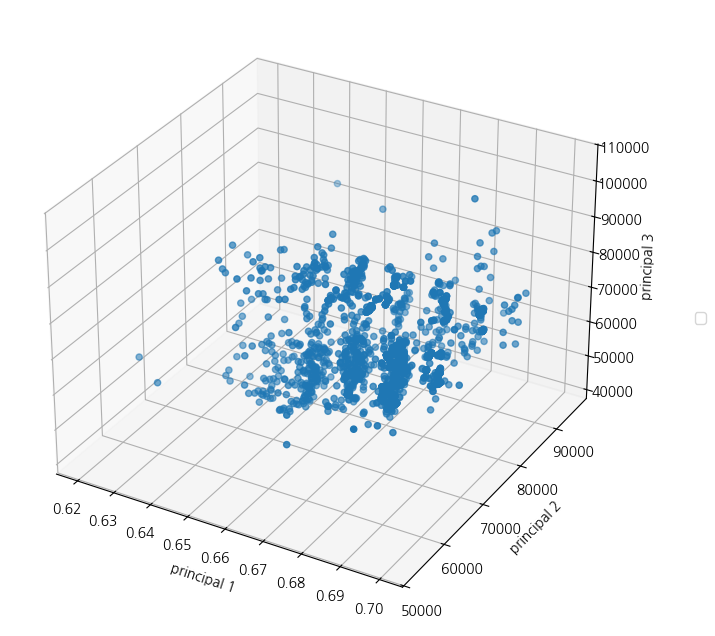

In [18]:
# 주요 피처 개수로 시각화 

if random_num >=3:

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x_reg.iloc[:,0], x_reg.iloc[:,1], x_reg.iloc[:,2])
    
    ax.set_xlabel('principal 1')
    ax.set_ylabel('principal 2')
    ax.set_zlabel('principal 3')


    plt.legend(loc='center left',  bbox_to_anchor=(1.1,0.5))
    plt.show()

In [19]:
def make_linear_equation(model, names):
    intercept = model.intercept_[0]
    coefs = model.coef_[0]

    terms = []
    for coef, name in zip(coefs, names):
        if abs(coef) < 1e-6:
            continue
        latex_name = name.replace(" ", "")
        terms.append(f"{coef:+.3f}{latex_name}")

    body = " ".join(terms)

    print()
    print(f'[회귀식]')
    print(rf"y = {intercept:.3f}{body}")


In [20]:
def make_poly_equation(model, feature_names, terms_per_line=6):
    intercept = model.intercept_[0]
    coefs = model.coef_[0]

    from collections import defaultdict
    terms_by_degree = defaultdict(list)

    for coef, name in zip(coefs, feature_names):
        
        # 차수 구분 (^ 기준)
        if "^4" in name:
            degree = 4
        elif "^3" in name:
            degree = 3
        elif "^2" in name:
            degree = 2
        else:
            degree = 1

        latex_name = name.replace(" ", "")
        terms_by_degree[degree].append(f"{coef:+.3f}{latex_name}")

    lines = []
    lines.append(f"y = {intercept:.3f}")

    for degree in sorted(terms_by_degree.keys()):
        terms = terms_by_degree[degree]

        for i in range(0, len(terms), terms_per_line):
            chunk = " ".join(terms[i:i+terms_per_line])
            lines.append(f" {chunk}")

    body = "\n".join(lines)

    print()
    print(f'[회귀식]')
    print(body)


In [21]:
# 모델 생성 및 회귀식 추정

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=12)

## 선형 회귀

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

print('------------선형 회귀---------------')
lin_score = model.score(x_test, y_test)
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)

print(f'score :', lin_score)
print(f'mse :', mse)
print(f'mae :', mae)

## 다항 회귀 

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=12)

degrees = range(1,16)
poly_score = [0,]
poly_mse = [0,]
poly_mae = [0,]

for i in range(1,len(degrees)):
    poly = PolynomialFeatures(include_bias=False, degree=degrees[i])
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)

    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)
    y_pred_poly = poly_reg.predict(x_poly_test)

    poly_score.append(poly_reg.score(x_poly_test, y_test))
    poly_mse.append(mean_squared_error(y_test, y_pred_poly))
    poly_mae.append(mean_absolute_error(y_test, y_pred_poly))


# 최대값 인덱스 찾기
max_index = poly_score.index(max(poly_score))

print()
print(f'다항 회귀에서 {max_index}차 회귀를 추천합니다!')

print()
print(f'------------{max_index}차 다항 회귀---------------')
print(f'score :', poly_score[max_index])
print(f'mse :', poly_mse[max_index])
print(f'mae :', poly_mae[max_index])


if lin_score < max(poly_score):
    poly = PolynomialFeatures(include_bias=False, degree=max_index)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)

    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)
    y_pred_poly = poly_reg.predict(x_poly_test)

    print()
    print(f'------------{max_index}차 다항 회귀---------------')
    print(f'회귀계수 : ', poly_reg.coef_)
    print(f'절편 : ', poly_reg.intercept_)

    make_poly_equation(poly_reg, feature_importance_name_num)

else:
    model = LinearRegression()
    model.fit(x_train, y_train)
    predict = model.predict(x_test)

    print()
    print('------------선형 회귀---------------')
    print(f'회귀계수 : ', model.coef_)
    print(f'절편 : ', model.intercept_)

    make_linear_equation(model, feature_importance_name_num)


------------선형 회귀---------------
score : 0.9273790719649568
mse : 974175400.7177396
mae : 27080.5193557295

다항 회귀에서 2차 회귀를 추천합니다!

------------2차 다항 회귀---------------
score : 0.9374848129134671
mse : 838611665.7939168
mae : 24144.19065992291

------------2차 다항 회귀---------------
회귀계수 :  [[ 6.59929003e+07  5.04326639e+01 -2.14807925e+00 -3.94783197e+07
  -6.68078569e+01  1.63243068e+01 -3.36926254e-05  1.39373690e-05
  -6.75320455e-05]]
절편 :  [-19970971.50744693]

[회귀식]
y = -19970971.507
 +65992900.342qW +50.433Power100 -2.148Power47
